In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/thaiglobal_logistics_data.csv')
df.info()
# df.head()
df['date'] = pd.to_datetime(df['date'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   shipment_id              500000 non-null  int64  
 1   date                     500000 non-null  object 
 2   origin                   500000 non-null  object 
 3   destination              500000 non-null  object 
 4   distance_km              500000 non-null  float64
 5   weight_kg                500000 non-null  float64
 6   vehicle_type             500000 non-null  object 
 7   vehicle_age_years        500000 non-null  float64
 8   driver_id                500000 non-null  int64  
 9   customer_id              500000 non-null  int64  
 10  product_type             500000 non-null  object 
 11  delivery_status          500000 non-null  object 
 12  delay_hours              500000 non-null  float64
 13  transport_cost           500000 non-null  float64
 14  reve

In [26]:
# a = df['origin']
# b = df[['origin']]
# print(a.head())
# print(b.head())

## a = df['origin','revenue']
## print(a.head())
# b = df[['origin','revenue']]
# print(b.head())

b = df[['origin','revenue']].copy()
print(b.head())

    origin   revenue
0  Pattaya   2748.14
1  Bangkok  12532.73
2  Pattaya   3750.48
3   Phuket   4572.87
4  Pattaya   1973.51


In [27]:
# df['delivery_status'].value_counts()
# ontime_delivery = df[df['delivery_status'] == 'On Time']
# ontime_delivery.info()

mask = df['delivery_status'] == 'On Time'
a = df[['origin','revenue']].copy()
a['on_time'] = mask
print(a.head())
a.info()

ontime_delivery = df[mask]
ontime_delivery.info()

    origin   revenue  on_time
0  Pattaya   2748.14     True
1  Bangkok  12532.73    False
2  Pattaya   3750.48    False
3   Phuket   4572.87     True
4  Pattaya   1973.51     True
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   origin   500000 non-null  object 
 1   revenue  500000 non-null  float64
 2   on_time  500000 non-null  bool   
dtypes: bool(1), float64(1), object(1)
memory usage: 8.1+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 399895 entries, 0 to 499999
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   shipment_id              399895 non-null  int64         
 1   date                     399895 non-null  datetime64[ns]
 2   origin                   399895 non-null  object        
 3   destination              399895 n

In [28]:
# mask1 = df['delivery_status'] == 'On Time'
# mask2 = df['revenue'] > df['revenue'].quantile(0.75)
# a = df[mask1 & mask2]
# print(a.shape)
# a.head()

a = df[(df['delivery_status'] == 'On Time') & (df['revenue'] > df['revenue'].quantile(0.75))]
print(a.shape)
a.head()

(99843, 21)


,shipment_id,date,origin,destination,distance_km,weight_kg,vehicle_type,vehicle_age_years,driver_id,customer_id,...,delivery_status,delay_hours,transport_cost,revenue,customer_satisfaction,fuel_consumption_liters,maintenance_cost,month,estimated_delivery_days,actual_delivery_days
15,16,2022-04-10,Phuket,London,9487.34,258.89,Truck,2.0,110,1310,...,On Time,0.0,10453.710,12742.53,4.40,958.86,1087.47,4,18.2,18.2
18,19,2023-10-24,Khon Kaen,Dubai,5731.44,9.80,Van,8.1,295,3555,...,On Time,0.0,10703.740,15543.55,4.86,991.94,2775.04,10,12.0,12.0
19,20,2022-11-05,Bangkok,Tokyo,6876.69,137.09,Truck,3.6,214,5247,...,On Time,0.0,13235.208,15073.26,4.07,939.61,1572.37,11,14.0,14.0
20,21,2022-12-10,Bangkok,London,6604.09,279.69,Truck,2.4,190,8986,...,On Time,0.0,10989.048,13292.65,4.47,688.52,616.82,12,13.7,13.7
22,23,2023-02-18,Phuket,Tokyo,6353.31,235.68,Airplane,8.7,61,728,...,On Time,0.0,11857.520,16106.46,4.08,488.93,1791.06,2,12.2,12.2


In [29]:
import json

# df[df['vehicle_type'] == 'Truck']['distance_km'].mean()

# dict / list comprehension
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

{'Ship': 5052.486323940959, 'Airplane': 5054.947626671585, 'Truck': 5056.012452181698, 'Van': 5053.6738746372675}


In [30]:
# route_summary = dict()
route_summary = {}
for origin in df['origin'].unique():
  for destination in df['destination'].unique():
    # key = f'{origin} - {destination}'
    key = '{0} - {1}'.format(origin,destination)
    # summary = dict()
    summary = {}
    summary['avg_cost'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['transport_cost'].mean()
    summary['avg_revenue'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['revenue'].mean()
    route_summary[key] = summary
# print(route_summary)
display(route_summary)

{'Pattaya - Tokyo': {'avg_cost': 6817.184588435375,
  'avg_revenue': 8461.81245505345},
 'Pattaya - London': {'avg_cost': 6762.491607262536,
  'avg_revenue': 8360.178453055505},
 'Pattaya - Sydney': {'avg_cost': 6755.76735186175,
  'avg_revenue': 8382.8245198646},
 'Pattaya - New York': {'avg_cost': 6799.842395642134,
  'avg_revenue': 8415.251402096037},
 'Pattaya - Singapore': {'avg_cost': 6804.372192879406,
  'avg_revenue': 8419.82305622153},
 'Pattaya - Dubai': {'avg_cost': 6764.4039654735325,
  'avg_revenue': 8387.435358845898},
 'Bangkok - Tokyo': {'avg_cost': 6786.46948108302,
  'avg_revenue': 8405.037174107943},
 'Bangkok - London': {'avg_cost': 6834.954784225484,
  'avg_revenue': 8448.534798673614},
 'Bangkok - Sydney': {'avg_cost': 6834.524224262928,
  'avg_revenue': 8456.824784316093},
 'Bangkok - New York': {'avg_cost': 6849.32181896655,
  'avg_revenue': 8470.767936098788},
 'Bangkok - Singapore': {'avg_cost': 6753.907760999586,
  'avg_revenue': 8346.376271688283},
 'Bangkok

In [68]:
# route_summary = dict()
route_summary = dict()
for origin in df['origin'].unique():
  for destination in df['destination'].unique():
    # key = f'{origin} - {destination}'
    key = '{0} - {1}'.format(origin,destination)
    # summary = dict()
    summary = dict()
    summary['avg_cost'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['transport_cost'].mean()
    summary['avg_revenue'] = df[(df['origin'] == origin) & (df['destination'] == destination)]['revenue'].mean()
    route_summary[key] = summary
# print(route_summary)
display(route_summary)

{'Pattaya - Tokyo': {'avg_cost': 6817.184588435375,
  'avg_revenue': 8461.81245505345},
 'Pattaya - London': {'avg_cost': 6762.491607262536,
  'avg_revenue': 8360.178453055505},
 'Pattaya - Sydney': {'avg_cost': 6755.76735186175,
  'avg_revenue': 8382.8245198646},
 'Pattaya - New York': {'avg_cost': 6799.842395642134,
  'avg_revenue': 8415.251402096037},
 'Pattaya - Singapore': {'avg_cost': 6804.372192879406,
  'avg_revenue': 8419.82305622153},
 'Pattaya - Dubai': {'avg_cost': 6764.4039654735325,
  'avg_revenue': 8387.435358845898},
 'Bangkok - Tokyo': {'avg_cost': 6786.46948108302,
  'avg_revenue': 8405.037174107943},
 'Bangkok - London': {'avg_cost': 6834.954784225484,
  'avg_revenue': 8448.534798673614},
 'Bangkok - Sydney': {'avg_cost': 6834.524224262928,
  'avg_revenue': 8456.824784316093},
 'Bangkok - New York': {'avg_cost': 6849.32181896655,
  'avg_revenue': 8470.767936098788},
 'Bangkok - Singapore': {'avg_cost': 6753.907760999586,
  'avg_revenue': 8346.376271688283},
 'Bangkok

In [31]:
print(json.dumps(route_summary,indent=2))

{
  "Pattaya - Tokyo": {
    "avg_cost": 6817.184588435375,
    "avg_revenue": 8461.81245505345
  },
  "Pattaya - London": {
    "avg_cost": 6762.491607262536,
    "avg_revenue": 8360.178453055505
  },
  "Pattaya - Sydney": {
    "avg_cost": 6755.76735186175,
    "avg_revenue": 8382.8245198646
  },
  "Pattaya - New York": {
    "avg_cost": 6799.842395642134,
    "avg_revenue": 8415.251402096037
  },
  "Pattaya - Singapore": {
    "avg_cost": 6804.372192879406,
    "avg_revenue": 8419.82305622153
  },
  "Pattaya - Dubai": {
    "avg_cost": 6764.4039654735325,
    "avg_revenue": 8387.435358845898
  },
  "Bangkok - Tokyo": {
    "avg_cost": 6786.46948108302,
    "avg_revenue": 8405.037174107943
  },
  "Bangkok - London": {
    "avg_cost": 6834.954784225484,
    "avg_revenue": 8448.534798673614
  },
  "Bangkok - Sydney": {
    "avg_cost": 6834.524224262928,
    "avg_revenue": 8456.824784316093
  },
  "Bangkok - New York": {
    "avg_cost": 6849.32181896655,
    "avg_revenue": 8470.76793609

In [32]:
import pprint as pprint

In [33]:
pprint.pprint(route_summary)

{'Bangkok - Dubai': {'avg_cost': 6735.662840421664,
                     'avg_revenue': 8330.1760087241},
 'Bangkok - London': {'avg_cost': 6834.954784225484,
                      'avg_revenue': 8448.534798673614},
 'Bangkok - New York': {'avg_cost': 6849.32181896655,
                        'avg_revenue': 8470.767936098788},
 'Bangkok - Singapore': {'avg_cost': 6753.907760999586,
                         'avg_revenue': 8346.376271688283},
 'Bangkok - Sydney': {'avg_cost': 6834.524224262928,
                      'avg_revenue': 8456.824784316093},
 'Bangkok - Tokyo': {'avg_cost': 6786.46948108302,
                     'avg_revenue': 8405.037174107943},
 'Chiang Mai - Dubai': {'avg_cost': 6805.050394271676,
                        'avg_revenue': 8428.279080831686},
 'Chiang Mai - London': {'avg_cost': 6862.917267320773,
                         'avg_revenue': 8494.774248480107},
 'Chiang Mai - New York': {'avg_cost': 6745.767373742214,
                           'avg_revenue': 8339.395

In [34]:
avg_distance_vehicle = {vtype: df[df['vehicle_type'] == vtype]['distance_km'].mean()
                               for vtype in df['vehicle_type'].unique()}
print(avg_distance_vehicle)

{'Ship': 5052.486323940959, 'Airplane': 5054.947626671585, 'Truck': 5056.012452181698, 'Van': 5053.6738746372675}


In [35]:
vtype_distance = df.groupby(by=['vehicle_type'])['distance_km'].mean()
print(vtype_distance)

vehicle_type
Airplane    5054.947627
Ship        5052.486324
Truck       5056.012452
Van         5053.673875
Name: distance_km, dtype: float64


In [54]:
vtype_measures = df.groupby(by=['vehicle_type']).agg(
                    {'distance_km':'mean',
                      'revenue':'sum',
                      'origin':pd.Series.mode}
                    )
print(vtype_measures)
print()

              distance_km       revenue      origin
vehicle_type                                       
Airplane      5054.947627  1.050049e+09      Phuket
Ship          5052.486324  1.052590e+09     Pattaya
Truck         5056.012452  1.054601e+09   Khon Kaen
Van           5053.673875  1.052400e+09  Chiang Mai



In [56]:
vtype_measures.columns = ['avg_distance','total_revenue','most_freq_origin']
print(vtype_measures)

              avg_distance  total_revenue most_freq_origin
vehicle_type                                              
Airplane       5054.947627   1.050049e+09           Phuket
Ship           5052.486324   1.052590e+09          Pattaya
Truck          5056.012452   1.054601e+09        Khon Kaen
Van            5053.673875   1.052400e+09       Chiang Mai


In [ ]:
print(df['destination'].unique())
if 'Chula' in df['destination'].unique():
  print('Found')
else:
  print('Not Found')

In [82]:
type(df['destination'].unique())

numpy.ndarray

In [60]:
set(df['destination'])

{'Dubai', 'London', 'New York', 'Singapore', 'Sydney', 'Tokyo'}

In [62]:
set_destination = set(df['destination'])
print(set_destination)

{'London', 'Tokyo', 'New York', 'Dubai', 'Singapore', 'Sydney'}


In [ ]:
if 'Chula' in set_destination:
  print('Found')
else:
  print('Not Found')

set_origin = set(df['origin'])
print(set_origin.union(set_destination))

<Axes: >

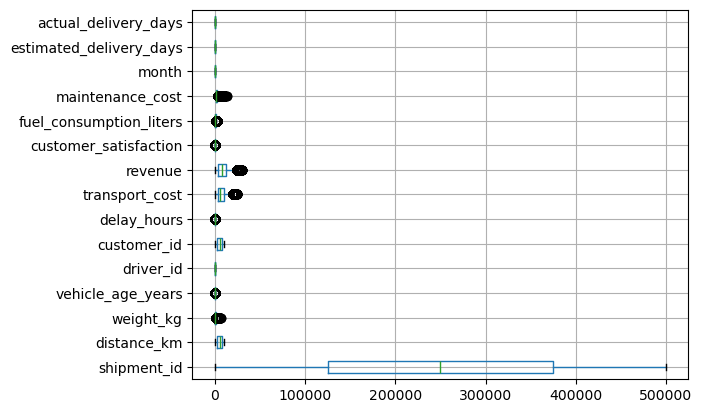

In [105]:
df.boxplot(vert=False)

customer_satisfaction    Axes(0.125,0.11;0.775x0.77)
dtype: object

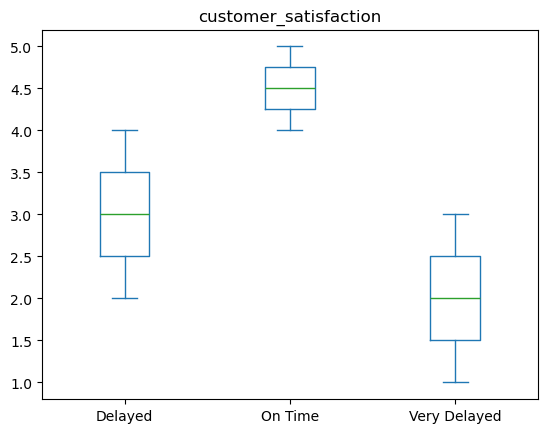

In [98]:
df.plot(kind='box', by='delivery_status', column='customer_satisfaction')

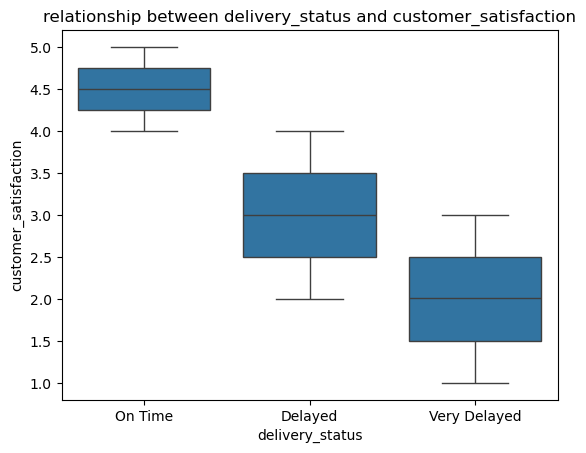

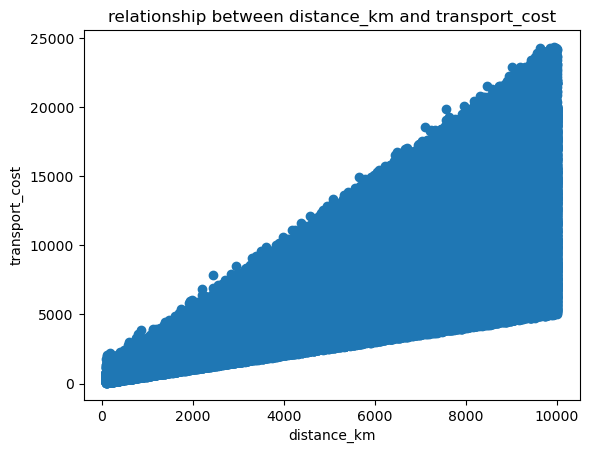

In [209]:
sns.boxplot(x='delivery_status',y='customer_satisfaction',data=df)
plt.title('relationship between delivery_status and customer_satisfaction')
plt.show()

plt.scatter(df['distance_km'],df['transport_cost'])
plt.title('relationship between distance_km and transport_cost')
plt.xlabel('distance_km')
plt.ylabel('transport_cost')
plt.show()

In [107]:
def category_distance(d):
  if d < 1000:
    return 'short'
  elif d < 5000:
    return 'medium'
  else:
    return 'long'

df['distance_category'] = df['distance_km'].apply(category_distance)
print(df[['distance_km','distance_category']].head(10))
print(df[['distance_km','distance_category']].sample(10))

   distance_km distance_category
0      1737.89            medium
1      8206.58              long
2      1438.34            medium
3      4271.25            medium
4      1367.44            medium
5       437.70             short
6      8191.13              long
7       415.70             short
8      6651.43              long
9      8259.27              long
        distance_km distance_category
290271      7581.38              long
165984       600.85             short
143195      1054.74            medium
280922      8212.76              long
257273       123.63             short
352184      8629.33              long
487545      1375.28            medium
176001      8359.72              long
305092      1815.91            medium
413888      4020.50            medium


In [109]:
df['profit'] = df.apply(lambda row: (row['revenue'] - row['transport_cost']),axis=1)
print(df[['revenue','transport_cost','profit']].head(10))

    revenue  transport_cost    profit
0   2748.14        1983.640   764.500
1  12532.73        9021.030  3511.700
2   3750.48        2855.150   895.330
3   4572.87        3714.920   857.950
4   1973.51        1535.690   437.820
5    642.65         534.312   108.338
6   7020.95        6388.236   632.714
7   1489.48         999.650   489.830
8   6726.45        5911.570   814.880
9   5875.13        5194.720   680.410
